In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
url = 'https://drive.google.com/file/d/1eWioTdLLczNlfaXSl1F3_UU97x90bHU6/view?usp=sharing'
dataset = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
dataframe = pd.read_excel(dataset)

dataframe

,location,vaccine,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Dominican Republic,"Oxford/AstraZeneca, Sinovac",1,0,0,NaN
1,Dominican Republic,"Oxford/AstraZeneca, Sinovac",2,385,385,NaN
2,Dominican Republic,"Oxford/AstraZeneca, Sinovac",3,1379,1379,NaN
3,Dominican Republic,"Oxford/AstraZeneca, Sinovac",4,5328,5328,NaN
4,Dominican Republic,"Oxford/AstraZeneca, Sinovac",5,10200,10200,NaN
5,Dominican Republic,"Oxford/AstraZeneca, Sinovac",6,13087,13087,NaN
6,Dominican Republic,"Oxford/AstraZeneca, Sinovac",10,14264,14264,NaN
7,Dominican Republic,"Oxford/AstraZeneca, Sinovac",14,26400,26400,NaN
8,Dominican Republic,"Oxford/AstraZeneca, Sinovac",15,60000,60000,NaN
9,Dominican Republic,"Oxford/AstraZeneca, Sinovac",16,105000,105000,NaN


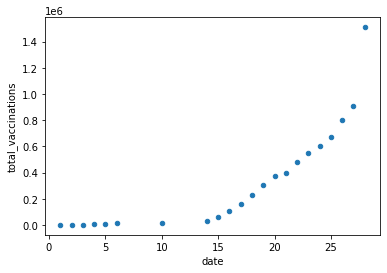

In [11]:
dataframe.plot.scatter(x='date', y='total_vaccinations')
plt.show()

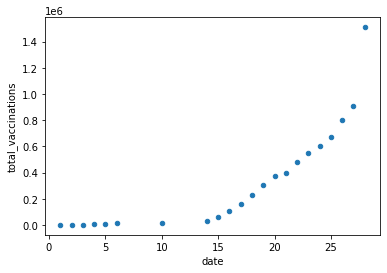

Epoch 1000
    w: 26543.5  b: -40838.5
    error: [5.55179697e+10]
Epoch 2000
    w: 28250.2  b: -75766.4
    error: [5.24523508e+10]
Epoch 3000
    w: 29668.3  b: -104788.6
    error: [5.03357614e+10]
Epoch 4000
    w: 30846.7  b: -128903.8
    error: [4.88744087e+10]
Epoch 5000
    w: 31825.8  b: -148941.6
    error: [4.78654497e+10]
Epoch 6000
    w: 32639.4  b: -165591.3
    error: [4.71688361e+10]
Epoch 7000
    w: 33315.4  b: -179426.0
    error: [4.66878745e+10]
Epoch 8000
    w: 33877.1  b: -190921.5
    error: [4.63558051e+10]
Epoch 9000
    w: 34343.9  b: -200473.3
    error: [4.61265351e+10]
Epoch 10000
    w: 34731.7  b: -208410.1
    error: [4.59682407e+10]
Epoch 11000
    w: 35053.9  b: -215004.9
    error: [4.58589497e+10]
Epoch 12000
    w: 35321.7  b: -220484.7
    error: [4.57834922e+10]
Epoch 13000
    w: 35544.2  b: -225038.0
    error: [4.57313942e+10]
Epoch 14000
    w: 35729.1  b: -228821.4
    error: [4.56954243e+10]
Epoch 15000
    w: 35882.7  b: -231965.1
    

Text(0, 0.5, 'ECM')

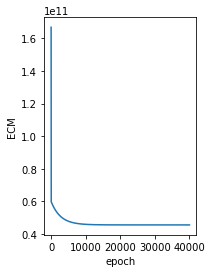

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#
# Funciones para el cálculo del gradiente descendente
# 

def calcular_modelo(w,b,x):
    '''Retorna el valor w*x+b correspondiente al modelo lineal'''
    return w*x+b

def calcular_error(y,y_):
    '''Calcula el error cuadrático medio entre el dato original (y)
       y el dato generado por el modelo (y_)'''
    N = y.shape[0]
    error = np.sum((y-y_)**2)/N
    return error

def gradiente_descendente(w_, b_, alpha, x, y):
    '''Algoritmo del gradiente descendente para minimizar el error
       cuadrático medio'''
    N = x.shape[0]      # Cantidad de datos

    # Gradientes: derivadas de la función de error con respecto
    # a los parámetros "w" y "b"
    dw = -(2/N)*np.sum(x*(y-(w_*x+b_)))
    db = -(2/N)*np.sum(y-(w_*x+b_))

    # Actualizar los pesos usando la fórmula del gradiente descendente
    w = w_ - alpha*dw
    b = b_ - alpha*db

    return w, b

#
# Leer los datos en un DataFrame de Pandas
#

url = 'https://drive.google.com/file/d/1eWioTdLLczNlfaXSl1F3_UU97x90bHU6/view?usp=sharing'
dataset = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
dataframe = pd.read_excel(dataset)

dataframe

# Al graficar los datos se observa una tendencia lineal
dataframe.plot.scatter(x='date', y='total_vaccinations')
plt.show()


x = dataframe['date'].values
y = dataframe['total_vaccinations'].values

#
# Aprender los coeficientes "w" y "b" usando el gradiente descendente
#

# Inicializar "w" y "b" aleatoriamente, definir alpha y número de iteraciones.
# En este caso se debe definir una tasa de aprendizaje muy pequeña (w=0.0004) para
# garantizar la convergencia del algoritmo


np.random.seed(2)           # Para reproducibilidad del entrenamiento
w = np.random.randn(1)[0]
b = np.random.randn(1)[0]

alpha = 0.0004
nits = 40000

# Entrenamiento
error = np.zeros((nits,1))
for i in range(nits):
    # Actualizar valor de los pesos usando el gradiente descendente
    [w, b] = gradiente_descendente(w,b,alpha,x,y)

    # Calcular el valor de la predicción
    y_ = calcular_modelo(w,b,x)

    # Actualizar el valor del error
    error[i] = calcular_error(y,y_)

    # Imprimir resultados cada 1000 epochs
    if (i+1)%1000 == 0:
        print("Epoch {}".format(i+1))
        print("    w: {:.1f}".format(w), " b: {:.1f}".format(b))
        print("    error: {}".format(error[i]))
        print("=======================================")

# Gráfica de ECM vs iteraciones y de la regresión lineal resultante
plt.subplot(1,2,1)
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')

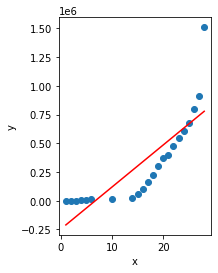

En el dia 136, equivalente al 1ro de julio del 2021, tendremos 4734446 ciudadanos vacunados.


In [19]:
y_regr = calcular_modelo(w,b,x)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Predicción
Dias = 136 #Equivalente al primero de julio del 2021
Vacunados = calcular_modelo(w,b,Dias)
print("En el dia {},".format(Dias),"equivalente al 1ro de julio del 2021, tendremos {:.0f}".format(Vacunados), "ciudadanos vacunados.")

In [4]:
from sklearn.cluster import KMeans
datos1 = datos[['CIRCUITOS 24 Hrs','CLIENTES EN CIRCUITOS 24 Hrs']]
print(datos1)
kmeans = KMeans (n_clusters=5).fit(datos1)
centroids = kmeans.cluster_centers_
print(centroids)

     CIRCUITOS 24 Hrs  CLIENTES EN CIRCUITOS 24 Hrs
0                   6                         17967
1                   6                         18035
2                   6                         18192
3                   6                         17919
4                   6                         17919
..                ...                           ...
495                13                         55566
496                13                         57519
497                13                         57949
498                13                         56056
499                14                         54958

[500 rows x 2 columns]
[[2.70789474e+01 1.20148763e+05]
 [1.18032787e+01 3.02055410e+04]
 [7.09160305e+00 1.49146031e+04]
 [1.33796296e+01 6.35351389e+04]
 [3.49523810e+01 1.52292635e+05]]


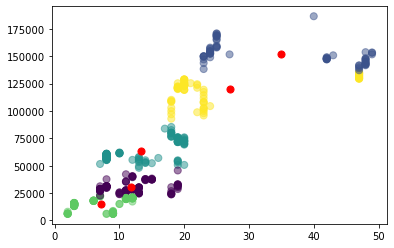

In [16]:
plt.scatter(datos1['CIRCUITOS 24 Hrs'], datos1['CLIENTES EN CIRCUITOS 24 Hrs'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()